In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [7]:
# Find missing values in data
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#Find summarizing statistics for the data
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
#Car Name can be ignored as it doesnt decide price
df=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
#Create feature current year since this can determine depreciation of car and hence determine selling price
df["Curr_Year"]=2020
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Curr_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [14]:
df["Years_old"]=df["Curr_Year"]-df["Year"]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Curr_Year,Years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [15]:
#Only knowing how much old car is is reqd to determine price now curr year and year are not needed
df.drop(["Year"], axis=1, inplace=True)
df.drop(["Curr_Year"], axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


Here "Fuel_Type", "Seller_Type", "Transmission" and "Owner" are categorical features. Hence we will find unique values in these features

In [6]:
print(df["Fuel_Type"].unique())
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [16]:
#To convert categorical features to binary values and drop the original columns. 
#Ex. Fuel will be split in Fuel_Petrol, Fuel_Diesel, Fuel_CNG and original column Fuel will be dropped
#if fuel type is Petrol then values will be Fuel_Petrol=1, Fuel_Diesel=0, Fuel_CNG=0
df=pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [22]:
#Find correlation amongst features
correlation_matrix=df.corr()
print(correlation_matrix)

                        Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
Years_old                   -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                        Years_old  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price           -0.236141          0.552339         -0.540571   
Present_Price            0.047584          0.473306         -0.465244   


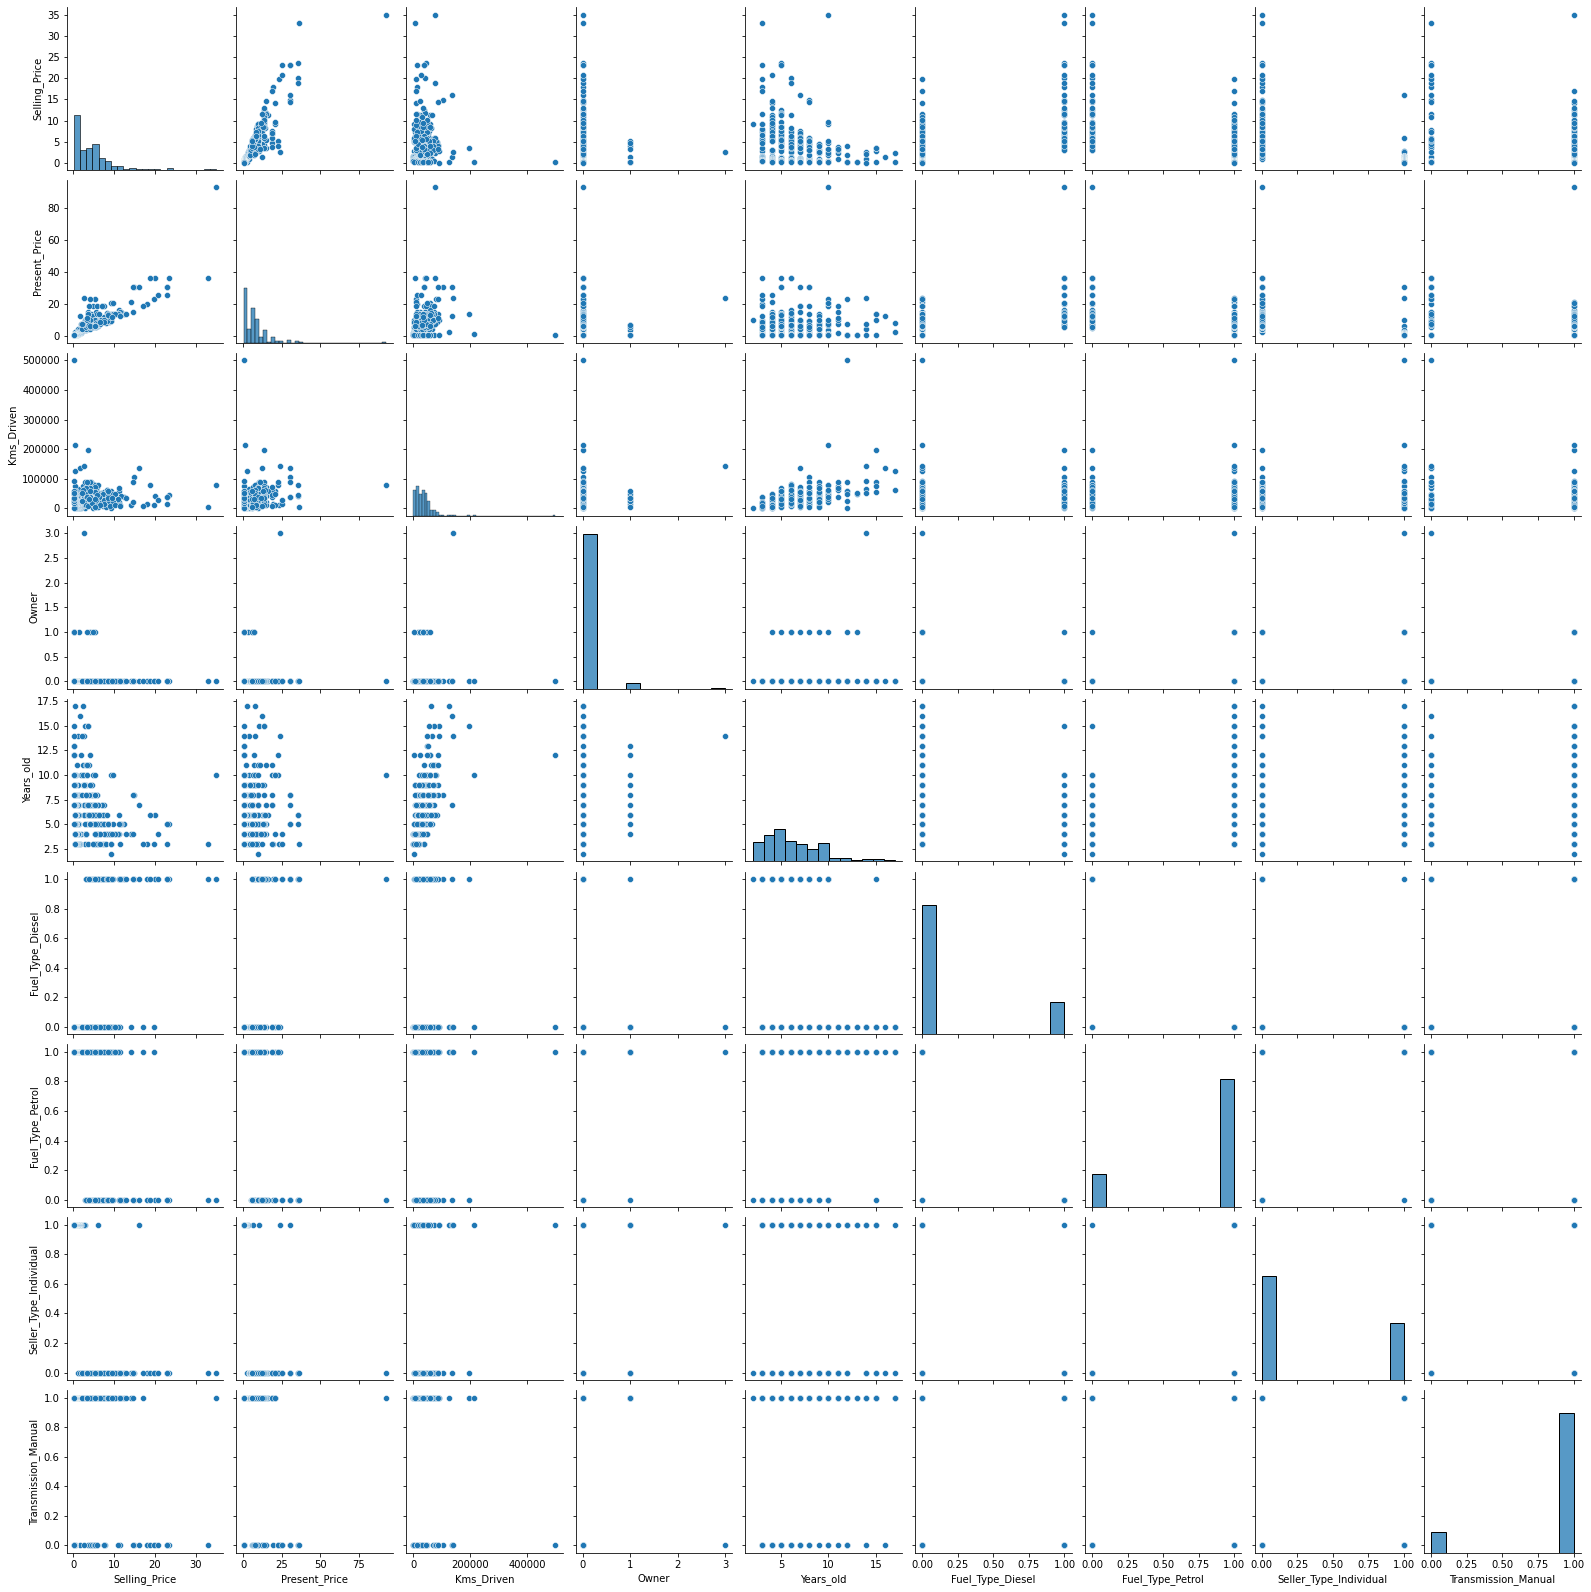

In [19]:
#visualize correlations using seaborn library
sns.pairplot(df)

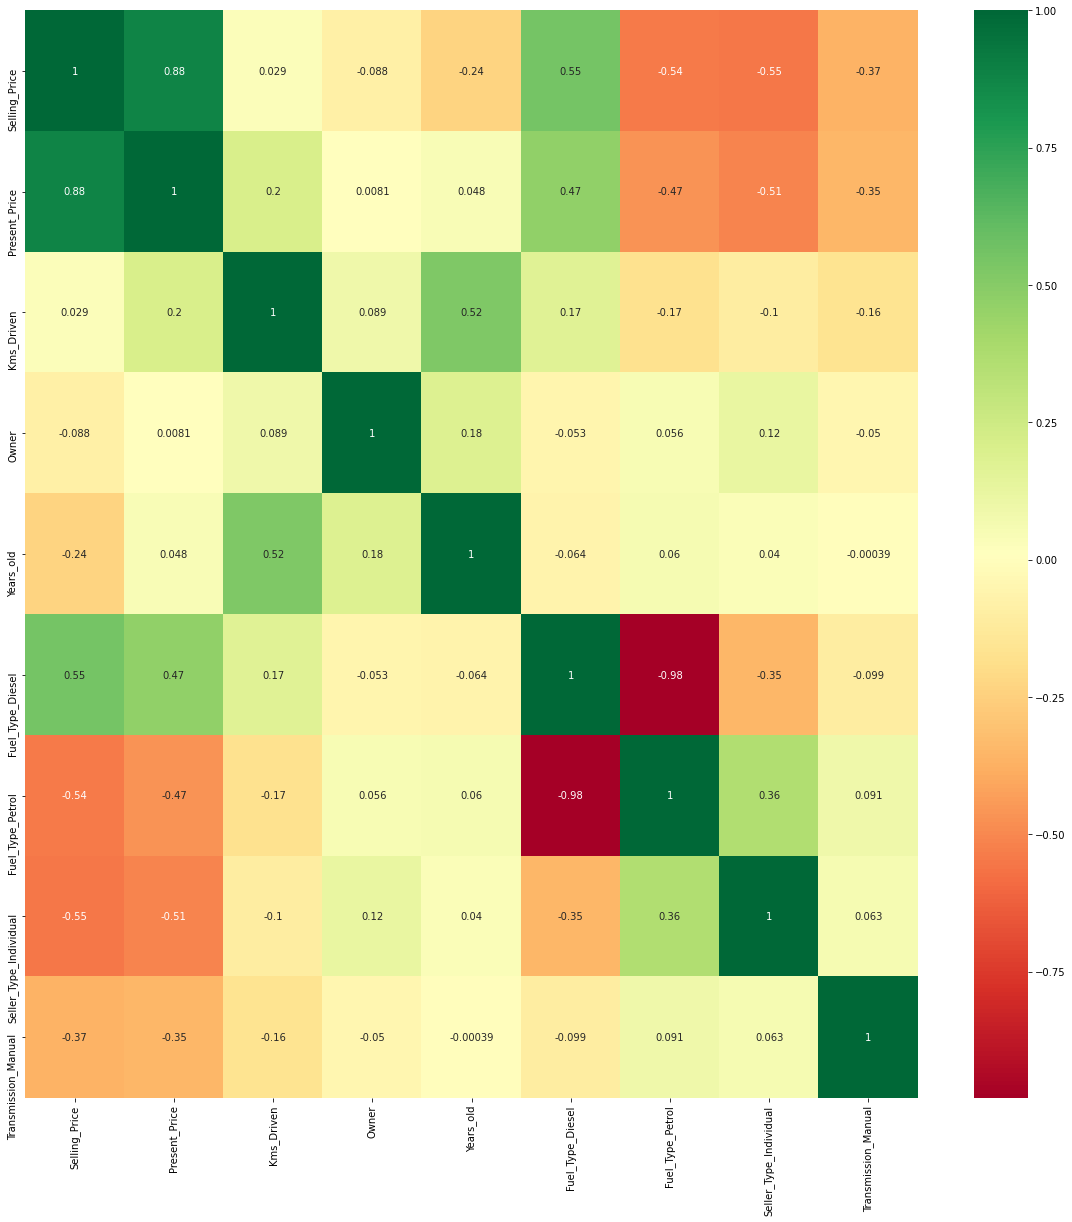

In [30]:
##Visulaize correlations better as heat map
plt.figure(figsize=(20,20))  
g=sns.heatmap(correlation_matrix,annot=True,cmap="RdYlGn")

In [31]:
# Fuel_Type_Petrol and Fuel_Type_Diesel are highly negatively correlated(Red)
# Present Price and Selling_Price are highly positively correlated(Green)

#Independednt Features(Input X) - all features except selling price
X=df.iloc[:,1:]
#Dependednt Feature(label Y)- only Selling_Price
y=df.iloc[:,0]
print(X,y)

     Present_Price  Kms_Driven  Owner  Years_old  Fuel_Type_Diesel  \
0             5.59       27000      0          6                 0   
1             9.54       43000      0          7                 1   
2             9.85        6900      0          3                 0   
3             4.15        5200      0          9                 0   
4             6.87       42450      0          6                 1   
..             ...         ...    ...        ...               ...   
296          11.60       33988      0          4                 1   
297           5.90       60000      0          5                 0   
298          11.00       87934      0         11                 0   
299          12.50        9000      0          3                 1   
300           5.90        5464      0          4                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0

In [33]:
# Use ExtraTreesRegressor which is a Ensemble of Decision Trees using Bagging which chooses split node randomly
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
#Fit the model on our features
model.fit(X,y)

ExtraTreesRegressor()

In [39]:
#ExtraTreesRegressor is capable of returning the importance of each feature by 
#how much info gain happened when that particular feature was chosen as split using the method model.feature_impotances_
print(model.feature_importances_)

[0.39411937 0.03943449 0.00046473 0.07545232 0.22085138 0.01171757
 0.11928948 0.13867066]


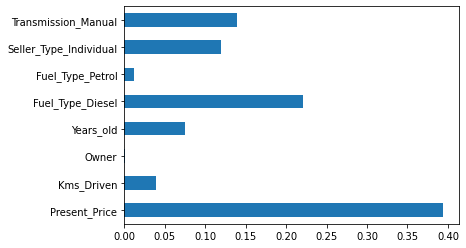

In [41]:
#Visualizing Feature imortances
feat_importances=pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.plot(kind='barh') 
plt.show()

We can see that Owner and Fuel_Type_Petrol hardly matters in determining car selling price

In [74]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)

(240, 8)


In [75]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [76]:
# Hyperparameter for RandomForestRegressor
#No. of Trees in the Random Forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
#maximum no. of features to be considered while deciding split, auto means consider all features, sqrt means coonsider sqrt(total features)
max_features=["auto","sqrt"]
#maximum depth allowed for each tree
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=6)]
#minimum number of samples to split an internal node
min_samples_split=[2,5,10,15,100]
#minimum number of samples needed at each leaf node
min_samples_leaf=[1,2,5,10]

In [77]:
#Deciding Hyperparameters using RandomizedSearchCV which chooses from available hyperparameters which gives best performance
#Works faster than other hyperparameter deciders
from sklearn.model_selection import RandomizedSearchCV
random_grid={"n_estimators":n_estimators, "max_features":max_features, "max_depth":max_depth, "min_samples_split":min_samples_split, "min_samples_leaf": min_samples_leaf }
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid, scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42, n_jobs=1)

In [78]:
#Cross Validation for randomforestregressor choosing best parameters from given parameters that will give best performance for our model
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
predictions=rf_random.predict(X_test)
print(predictions)

[22.66661  4.02596  4.11915  4.4911   3.58114  7.78245  0.43409  0.62849
  5.4842   4.65355  1.10666  0.86253  5.0643   4.10905  5.21254  3.57662
  5.78824 26.80174  3.11472  3.06495  2.81015  0.39355  4.15144  5.90321
  9.23197  5.93059 22.66661  2.9639   1.47164  0.57558  5.87701  1.23716
  0.46046  5.44855  6.24495  6.78465  3.23965  5.61365  2.84446  2.18301
  0.71963  0.62796  0.54157 10.49304  4.4243   3.97049  6.88955  0.26095
  3.87688  7.06372  0.69547  0.48477  5.43073  0.66903 28.43031 22.71182
 10.45367  0.41326  0.306    0.42652  5.84389]


In [86]:
from sklearn import metrics
print("Accuracy of our model is: "+str(metrics.r2_score(y_test,predictions)*100)+"%")

Accuracy of our model is: 97.06293149818538%


c:\users\muska\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

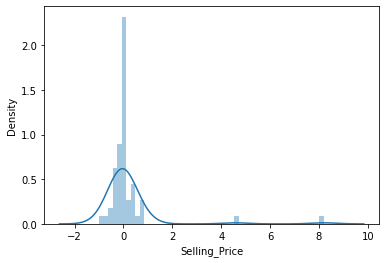

In [87]:
sns.distplot(y_test-predictions)

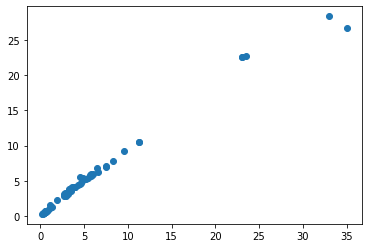

In [88]:
plt.scatter(y_test, predictions)

Since in scatter plot predictions are forming a line and in distplot since prediction is along the distribution hence our predictions are pretty good

# Trying using Gradient Booster for the same problem

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor()

In [90]:
predictions=gbr.predict(X_test)
print(predictions)

[22.97675153  4.02721178  4.18718146  4.42629113  3.25756573  7.60929505
  0.45124708  0.64941363  4.53994646  4.33786873  1.36007711  0.75174906
  5.18930883  4.18718146  4.73058329  3.41205854  5.61830139 34.74180118
  2.87419408  2.97373397  2.65033589  0.52182119  4.01899204  5.43939709
  9.2006442   5.31451631 22.97675153  2.70047975  1.4376044   0.59178407
  5.70749604  1.32335234  0.45124708  5.01372021  6.00371759  6.97345929
  2.879918    5.24159967  2.45396721  2.45566184  0.72924155  0.63246982
  0.64941363 10.46462709  4.66728071  4.15824226  6.85618035  0.11012528
  3.07413284  7.03495065  0.71431753  0.44448567  4.94695479  0.51803266
 32.94246675 22.93362609 10.77003961  0.44585746  0.2253296   0.41563208
  5.38151655]


c:\users\muska\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

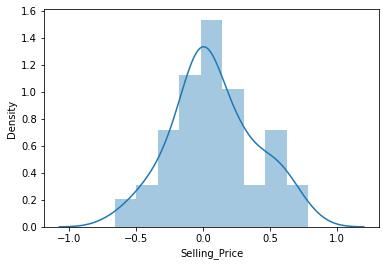

In [91]:
sns.distplot(y_test-predictions)

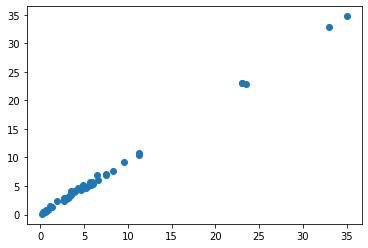

In [92]:
plt.scatter(y_test, predictions)

In [93]:
from sklearn import metrics
print("Accuracy of our model is: "+str(metrics.r2_score(y_test,predictions)*100)+"%")

Accuracy of our model is: 99.80503404235165%
